# Hierarchical Clustering

## Basics of hierarchical clustering

In addition to the procedure to perform hierarchical clustering, it attempts to help you answer an important question - how many clusters are present in your data? 

method: how to calculate proximity between two clusters. Decides how clusters are seperated at each step.

metric: the function that decides the distance between two objects.

**single** method based on two closest objects while **complete** based on two farthest objects, **average** based on the arithmetic mean and **centroid** on the geometric mean of all objects, **median** uses median of all objects, **ward** based on sum of squares and it is more concentric towards it center.

No one right method for all.
Need to carefully undersatand the distribution of data.

### Hierarchical clustering: ward method

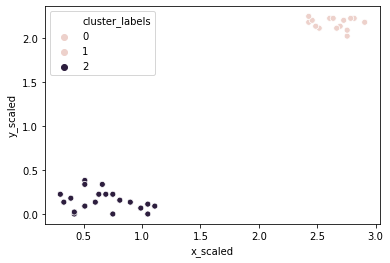

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster, linkage
import seaborn as sns

comic_con = pd.read_csv("comic_con.csv", index_col=0)

distance_matrix = linkage(comic_con[["x_scaled", "y_scaled"]], method="ward", metric="euclidean")
comic_con["cluster_labels"] = fcluster(distance_matrix, 2, criterion="maxclust")

sns.scatterplot(x="x_scaled", y="y_scaled", hue="cluster_labels", data=comic_con)
plt.show()

### Hierarchical clustering: single method

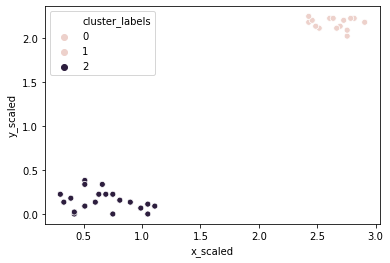

In [2]:
distance_matrix = linkage(comic_con[["x_scaled", "y_scaled"]], method="single", metric="euclidean")
comic_con["cluster_labels"] = fcluster(distance_matrix, 2, criterion="maxclust")

sns.scatterplot(x="x_scaled", y="y_scaled", hue="cluster_labels", data=comic_con)
plt.show()

The clusters formed are not different from the ones created using the ward method.

### Hierarchical clustering: complete method

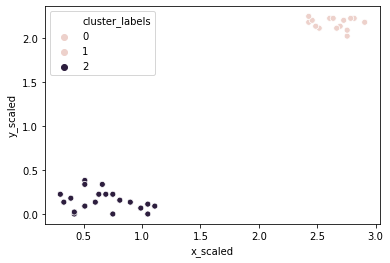

In [3]:
distance_matrix = linkage(comic_con[["x_scaled", "y_scaled"]], method="complete", metric="euclidean")
comic_con["cluster_labels"] = fcluster(distance_matrix, 2, criterion="maxclust")

sns.scatterplot(x="x_scaled", y="y_scaled", hue="cluster_labels", data=comic_con)
plt.show()

The clusters formed are not different from the ward or single methods. 

## Visualize clusters

Visualizing with seaborn is relatively straightforward than pyplot because of the hue parameter.

### Visualize clusters with matplotlib

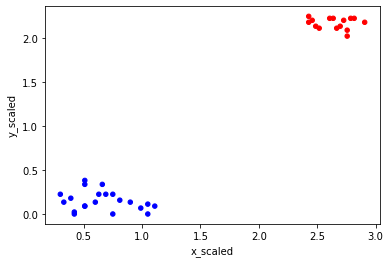

In [16]:
colors = {1:"red", 2:"blue"}
comic_con.plot.scatter(x="x_scaled", y="y_scaled",
                       c=comic_con["cluster_labels"].apply(lambda x: colors[x]))
plt.show()

### Visualize clusters with seaborn


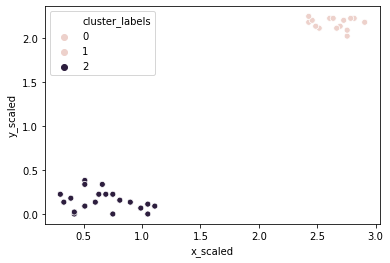

In [18]:
sns.scatterplot(x="x_scaled", y="y_scaled",
                       hue="cluster_labels", data=comic_con)
plt.show()

## How many clusters?


To decide on the numbe of clusters in hierarchical clustering, dendrogram can be used. y axis represents the distance or dissimilarity between clusters. The width of the u shape represents the distance between the two child clusters. Wider u means that the two child clusters were farther away from each other as compared to a narrower u. A horizontal line at any part of the figure, the intersects are the clusters at that stage and the distance between these intersects indicates the inter-cluster distance.

There is no right metric to decide how many clusters are ideal. An additional check of visualizing the data may be perfomed before deciding on the number of clusters.

### Create a dendrogram

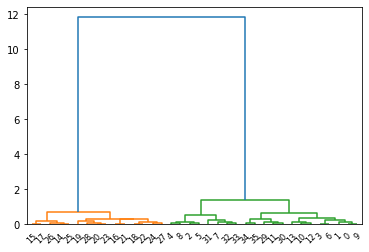

In [30]:
from scipy.cluster.hierarchy import dendrogram
distance_matrix = linkage(comic_con[["x_scaled", "y_scaled"]], method="ward", metric="euclidean")
dn = dendrogram(distance_matrix)
plt.show()

Notice the significant difference between the inter-cluster distances beyond the top two clusters.

## Limitations of hierarchical clustering

Increasing runtime with data points. The increase is quadratic and it is not feasible for large datasets

### Timing run of hierarchical clustering

In [32]:
%timeit linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', metric='euclidean')

1.12 ms ± 1.52 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### FIFA 18: exploring defenders


sliding_tackle    565.049719
aggression        286.276184
dtype: float64
scaled_sliding_tackle    1.000880
scaled_aggression        1.000109
dtype: float64
                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            2.911454           4.307614
2                            0.864640           2.010895
3                            1.153452           3.694109


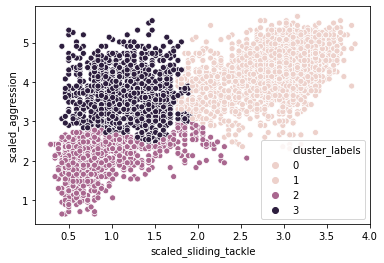

In [74]:
from scipy.cluster.vq import whiten
fifa = pd.read_csv("fifa_18_dataset.csv")
fifa = fifa[0:5000]
print(fifa[["sliding_tackle", "aggression"]].var())
fifa["scaled_sliding_tackle"] = whiten(fifa["sliding_tackle"]).round(2)
fifa["scaled_aggression"] = whiten(fifa["aggression"]).round(2)
print(fifa[["scaled_sliding_tackle", "scaled_aggression"]].var())

distance_matrix = linkage(fifa[["scaled_sliding_tackle", "scaled_aggression"]],
                         "ward")
fifa["cluster_labels"] = fcluster(distance_matrix, 3, criterion="maxclust")
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby("cluster_labels").mean())
sns.scatterplot(x="scaled_sliding_tackle", y="scaled_aggression", hue="cluster_labels", data=fifa)
plt.show()